## Colossus concentration demo

Welcome to the Colossus concentration demo. Concentration is defined as the ratio of the outer radius of a halo to the scale radius, a concept that goes back to the Navarro, Frenk & White papers that proposed the NFW density profile. 

In [2]:
from __future__ import print_function 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

As always with colossus, we need to set a cosmology.

In [3]:
from colossus.cosmology import cosmology
cosmology.setCosmology('planck15');

Let's import the concentration module:

In [4]:
from colossus.halo import concentration

Now we can evaluate concentrations for a range of models of the c-M relation. First, let's list the models Colossus implements:

In [5]:
for model_name in concentration.MODELS:
    print(model_name)

diemer15
klypin15_nu
klypin15_m
dutton14
bhattacharya13
prada12
klypin11
duffy08
bullock01


While there are functions for each of these models, the easier way to use the concentration module is through the unified concentration() interface. This function does a number of things: it converts between mass definitions, checks the validity of models and so on. Let's say we want to use the Bullock et al. 2001 model to get the concentration of a halo with virial mass 1E12 at z = 0.5:

In [6]:
concentration.concentration(1E12, 'vir', 0.5, model = 'bullock01')

7.372730331343524

Of course, the function also accepts an array of masses, and returns an array of concentrations:

In [8]:
M = 10**np.arange(10.0, 15.0, 1.0)
concentration.concentration(M, 'vir', 0.5, model = 'bullock01')

array([ 11.08187314,   9.14775359,   7.37273033,   5.79735274,   4.48558231])

However, not all models were constrained at all masses and redshifts, and Colossus can warn us in such cases:

In [9]:
concentration.concentration(M, 'vir', 0.5, model = 'dutton14')

/anaconda/lib/python3.6/site-packages/colossus/halo/concentration.py:323: UserWarning: Some masses or redshifts are outside the validity of the concentration model.
  warnings.warn('Some masses or redshifts are outside the validity of the concentration model.')


array([ 11.33628686,   9.32117855,   7.66427055,   6.30189013,   5.18168284])

The power-law model of Dutton & Maccio 2014 should probably not be used outside the range of masses where it was constrained. But which masses are valid and which aren't? Using the range_return parameter, we can get the function to return a mask that indicates the validity:

In [8]:
c, mask = concentration.concentration(M, 'vir', 0.5, model = 'dutton14', range_return = True)
print(mask)
print(c[mask])

[False  True  True  True  True]
[ 9.32117855  7.66427055  6.30189013  5.18168284]


Only the lowest mass bin is outside the range, so we won't use that. One thing the concentration module does *not* check is the cosmology: if a model was calibrated only for a particular cosmology, it can still be evaluated even if a different cosmology is set. For example:

In [9]:
concentration.concentration(1E12, 'vir', 0.5, model = 'duffy08')

6.226274912879475

The Duffy et al. 2008 model was calibrated for a WMAP5 cosmology, so care needs to be taken if we're working in a Planck 2015 cosmology (as set above). Let's put it all together and compare the models implemented in Colossus:

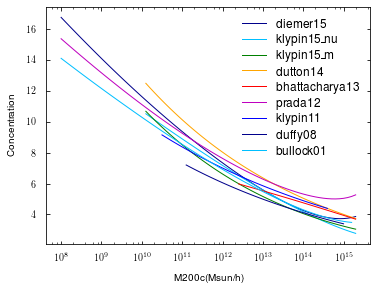

In [10]:
cosmology.setCosmology('bolshoi')
M = 10**np.arange(8.0, 15.4, 0.1)

plt.figure()
plt.xscale('log')
plt.xlabel('M200c(Msun/h)')
plt.ylabel('Concentration')
for model_name in concentration.MODELS:
    c, mask = concentration.concentration(M, '200c', 0.0, model = model_name, range_return = True)
    plt.plot(M[mask], c[mask], label = model_name.replace('_', '\_'))
plt.legend();